In [1]:
## EDA for UCB Project 1

In [26]:
#Dependencies & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [27]:
##Importing raw data and formatting into dataframes
fat_data = pd.read_csv(("Raw Data/Fat_Supply_Quantity_Data.csv"))
protein_data = pd.read_csv("Raw Data/Protein_Supply_Quantity_Data.csv")
calorie_data = pd.read_csv("Raw Data/Food_Supply_kcal_Data.csv")
weight_data = pd.read_csv("Raw Data/Food_Supply_Quantity_kg_Data.csv")

In [28]:
##Removing non-values
fat_data = fat_data.dropna(subset=["Obesity","Confirmed"])
protein_data = protein_data.dropna(subset=["Obesity","Confirmed"])
calorie_data = calorie_data.dropna(subset=["Obesity","Confirmed"])
weight_data = weight_data.dropna(subset=["Obesity","Confirmed"])

In [29]:
#View reamining data
fat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       163 non-null    object 
 1   Alcoholic Beverages           163 non-null    float64
 2   Animal Products               163 non-null    float64
 3   Animal fats                   163 non-null    float64
 4   Aquatic Products, Other       163 non-null    float64
 5   Cereals - Excluding Beer      163 non-null    float64
 6   Eggs                          163 non-null    float64
 7   Fish, Seafood                 163 non-null    float64
 8   Fruits - Excluding Wine       163 non-null    float64
 9   Meat                          163 non-null    float64
 10  Miscellaneous                 163 non-null    float64
 11  Milk - Excluding Butter       163 non-null    float64
 12  Offals                        163 non-null    float64
 13  Oilcrops  

In [30]:
##Creating Global Average Values
gaverage_obesity = fat_data["Obesity"].mean()
gaverage_confirmed = fat_data["Confirmed"].mean()
gaverage_deaths = fat_data["Deaths"].mean()
gaverage_recovered = fat_data["Recovered"].mean()
gaverage_active = fat_data["Active"].mean()

In [31]:
##Creating variables for columns of interest
obesity = fat_data["Obesity"]
confirmed = fat_data["Confirmed"]
deaths = fat_data["Deaths"]
recovered = fat_data["Recovered"]
active = fat_data["Active"]

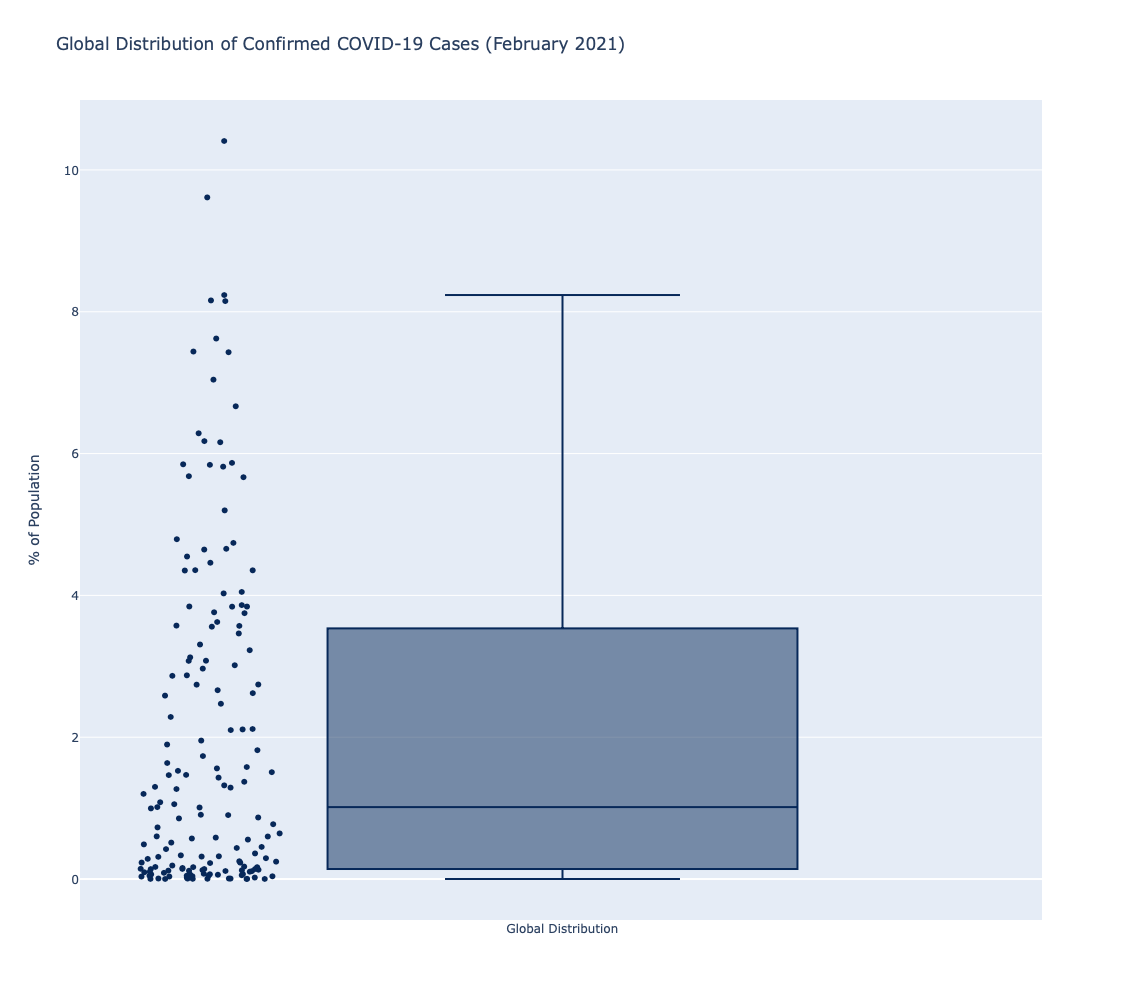


    This chart shows the distribution of COVID-19 rates for each country with available data.
    There are two outliers in the data: Montenegro with a COVID-19 rate of 10.4% and Czechia with a COVID-19 rate of 9.61%.
    The country with the highest COVID-19 rate is Montenegro with a COVID-19 rate of 10.4%.
    The country with the lowest COVID-19 rate is Vanuatu with a COVID-19 rate of 0.0003%.
    
Shapiro-Wilk Test - Statistic: 0.8208711743354797, p-value: 7.340330600291711e-13
Mean: 2.034353044050099
Median: 1.01437203280104
Range: 10.407887830433449
The variance for COVID-19 rates is 5.5466052705304705
The standard deviation for COVID-19 rates is 2.3551231964656267
Roughly 68% of the data is between -0.321 and 4.389
Roughly 95% of the data is between -2.676 and 6.745
Roughly 99.7% of the data is between -5.031 and 9.1


In [41]:
##Analysis of COVID data
confirmed_fig = go.Figure()

confirmed_fig.add_trace(go.Box(
    y=confirmed, 
    customdata=fat_data["Country"],
    boxpoints='all',
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)',
    hovertemplate='Country: %{customdata}<br>Confirmed %{y}%<br>',
))

confirmed_fig.update_layout(width=1000, height=1000, 
                  title="Global Distribution of Confirmed COVID-19 Cases (February 2021)", 
                  yaxis_title="% of Population")

confirmed_fig.update_traces(name='Global Distribution')

confirmed_fig.show()
print("""
    This chart shows the distribution of COVID-19 rates for each country with available data.
    There are two outliers in the data: Montenegro with a COVID-19 rate of 10.4% and Czechia with a COVID-19 rate of 9.61%.
    The country with the highest COVID-19 rate is Montenegro with a COVID-19 rate of 10.4%.
    The country with the lowest COVID-19 rate is Vanuatu with a COVID-19 rate of 0.0003%.
    """)

##Normality Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(confirmed)
print(f"Shapiro-Wilk Test - Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

##Summary Stats for COVID
mean_covid = np.mean(confirmed)
median_covid = np.median(confirmed)
mode_covid = stats.mode(confirmed)
range_covid = np.ptp(confirmed)


print(f"Mean: {mean_covid}")
print(f"Median: {median_covid}")
print(f"Range: {range_covid}")


##Calculate the variance and standard deviation for COVID
var_numpy = np.var(confirmed,ddof = 0)
sd_numpy = np.std(confirmed,ddof = 0)

print(f"The variance for COVID-19 rates is {var_numpy}")
print(f"The standard deviation for COVID-19 rates is {sd_numpy}")
print(f"Roughly 68% of the data is between {round(gaverage_confirmed-sd_numpy,3)} and {round(gaverage_confirmed+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(gaverage_confirmed-2*sd_numpy,3)} and {round(gaverage_confirmed+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(gaverage_confirmed-3*sd_numpy,3)} and {round(gaverage_confirmed+3*sd_numpy,3)}")

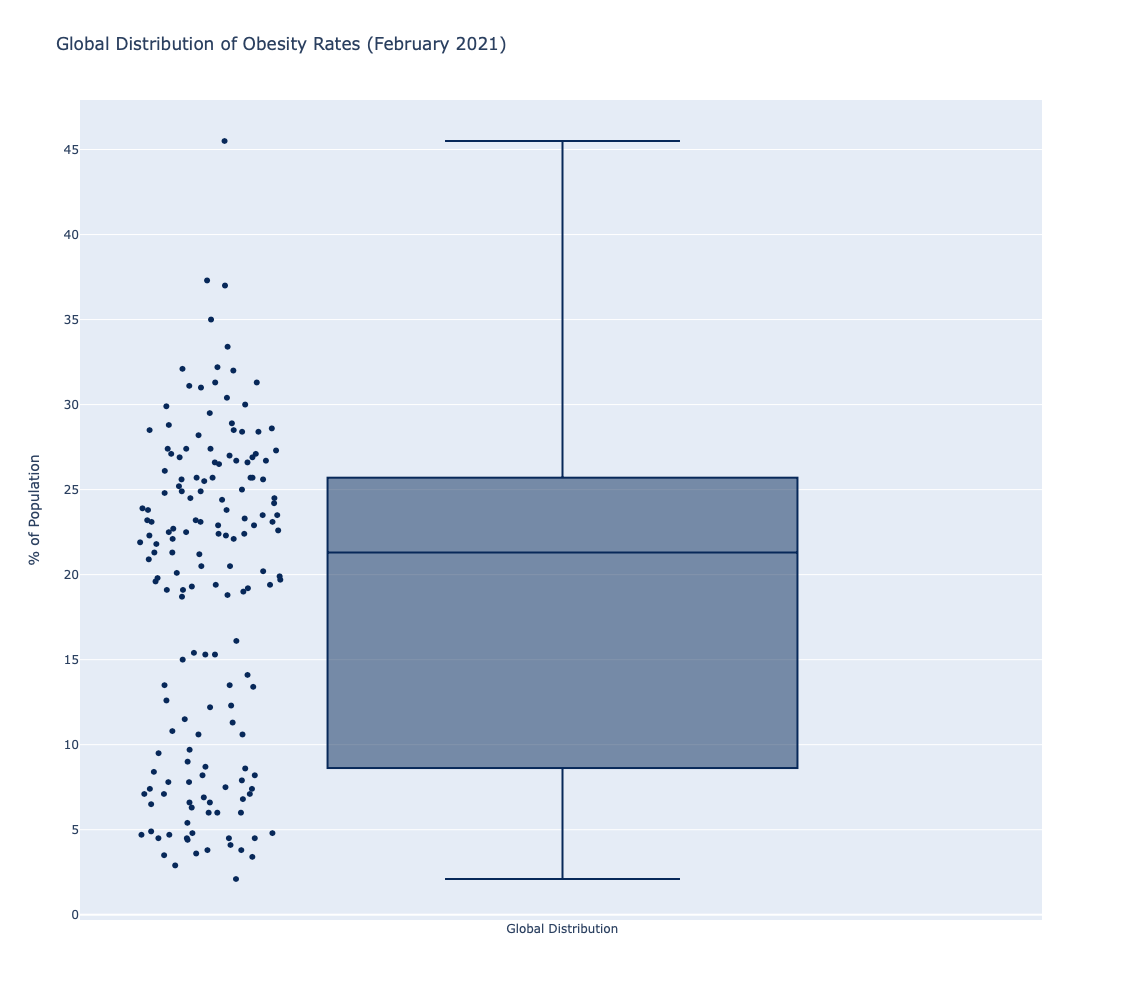


    This chart shows the distribution of obesity rates for each country with available data.
    The country with the highest obesity rate is Samoa with an obesity rate of 45.5%.
    The country with the lowest obesity rate is Vietnam with an obesity rate of 2.1%
    
Shapiro-Wilk Test - Statistic: 0.9384480714797974, p-value: 1.6983335626719054e-06
Mean: 18.70122699386503
Median: 21.3
Range: 43.4
The variance for obesity is 88.20306597914862
The standard deviation for obesity is 9.391648735932824
Roughly 68% of the data is between 9.31 and 28.093
Roughly 95% of the data is between -0.082 and 37.485
Roughly 99.7% of the data is between -9.474 and 46.876


In [40]:
##Analysis of Obesity data
obesity_fig = go.Figure()

obesity_fig.add_trace(go.Box(
    y=obesity, 
    customdata=fat_data["Country"],
    boxpoints='all',
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)',
    hovertemplate='Country: %{customdata}<br>Obesity %{y}%<br>',
))

obesity_fig.update_layout(width=1000, height=1000, 
                  title="Global Distribution of Obesity Rates (February 2021)", 
                  yaxis_title="% of Population")

obesity_fig.update_traces(name='Global Distribution')

obesity_fig.show()
print("""
    This chart shows the distribution of obesity rates for each country with available data.
    The country with the highest obesity rate is Samoa with an obesity rate of 45.5%.
    The country with the lowest obesity rate is Vietnam with an obesity rate of 2.1%
    """)

##Normality Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(obesity)
print(f"Shapiro-Wilk Test - Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

##Summary Stats for obesity
mean_obesity = np.mean(obesity)
median_obesity = np.median(obesity)
mode_obesity = stats.mode(obesity)
range_obesity = np.ptp(obesity)


print(f"Mean: {mean_obesity}")
print(f"Median: {median_obesity}")
print(f"Range: {range_obesity}")

##Calculate the variance and standard deviation for Obesity
var_numpy = np.var(obesity,ddof = 0)
sd_numpy = np.std(obesity,ddof = 0)

print(f"The variance for obesity is {var_numpy}")
print(f"The standard deviation for obesity is {sd_numpy}")
print(f"Roughly 68% of the data is between {round(gaverage_obesity-sd_numpy,3)} and {round(gaverage_obesity+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(gaverage_obesity-2*sd_numpy,3)} and {round(gaverage_obesity+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(gaverage_obesity-3*sd_numpy,3)} and {round(gaverage_obesity+3*sd_numpy,3)}")

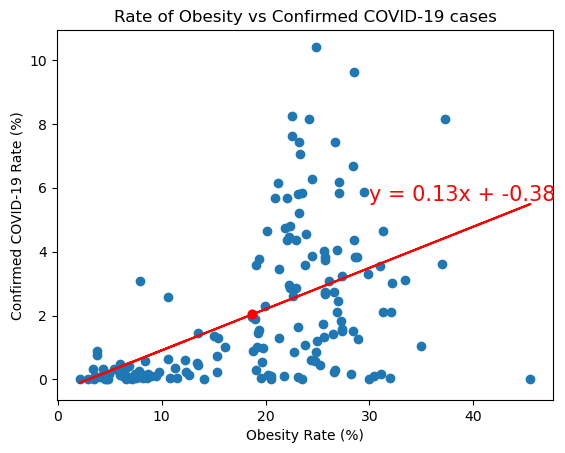

The r-squared is: 0.2647980987594157


2.1135787386808824e-12

In [44]:
##Create rough scatterplot showing relationship between obesity and covid
x_values = fat_data["Obesity"]
y_values = fat_data["Confirmed"]
plt.scatter(x_values, y_values)
plt.title("Rate of Obesity vs Confirmed COVID-19 cases")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")

#Add some regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.plot(gaverage_obesity, gaverage_confirmed, marker="o", color="red")

plt.annotate(line_eq,(30,5.6),fontsize=15,color="red")


##Add global average values to plot
plt.plot(gaverage_obesity, gaverage_confirmed, marker="o", color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}")

pvalue

The r-squared is: 0.09273011034365727


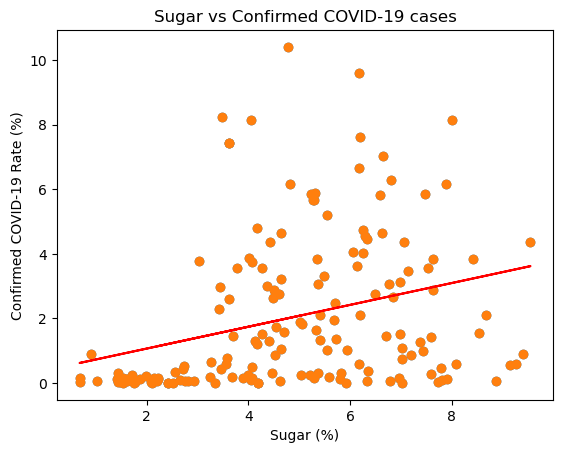

7.744856005577631e-05

In [20]:
##Create rough scatterplot showing relationship between sugar and covid
x_values = calorie_data["Sugar & Sweeteners"]
y_values = calorie_data['Confirmed']
plt.scatter(x_values, y_values)
plt.title("Sugar vs Confirmed COVID-19 cases")
plt.xlabel("Sugar")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Sugar (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")
print(f"The r-squared is: {rvalue**2}")

plt.show()
pvalue



In [17]:
##COnverting values to numerical
df = fat_data.copy()

# Replace '>2.5' with '2.5' and 'NA' with NaN (missing data)
df['Undernourished'] = df['Undernourished'].replace('>2.5', '2.5').replace('NA', pd.NA, regex=True)

# Convert the column to numeric
df['Undernourished'] = pd.to_numeric(df['Undernourished'], errors='coerce')

<Axes: >

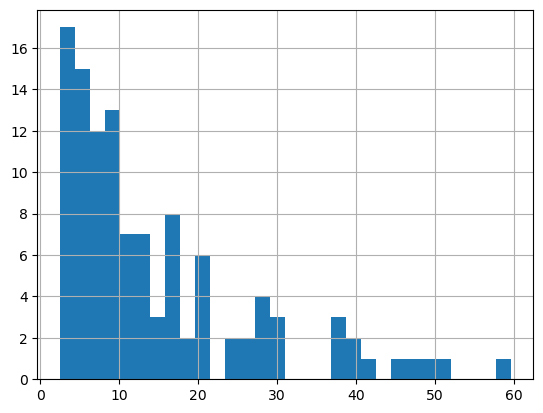

In [18]:
df["Undernourished"].hist(bins=30)